*"Pass a function and its parameter to another function as parameters, do some computation and return the value of that computation and the value of calling the function with its parameter as separate values."*

**wrapper(x, f)** returns the result of calling your function **f** with its parameter **x** or something else with the same return type as your function and the result of **wrapper**'s computation as separate values.
```
def wrapper(x, f):
  # do some computation
  result = f(x) # maybe call f(x) or a value of the same type
  # do some more computation
  # return result of calling f(x) or a value of the same type
  # return result of computation
  return (result, computation_result)
```
This can be implemented by passing a function or function pointer to another function or class method or passing a class reference or pointer to a function or class method and returning both values in a composite data type.

*"To take the return value of a function and pass it to another function as a parameter, instead of directly passing the called function's parameter to the wrapper function, the parameter of the wrapper function needs to use the type that the wrapper function returns."*

**wrapper((b<sub>1</sub>, t<sub>1</sub>), f)** returns a value with the type **('b, t)** where **'b** is the return type of **f** and **t** is the return type of the computation done inside **wrapper**. **x** is the parameter of **f**, **b<sub>1</sub>** is a value of type **'b** and **t<sub>1</sub>** is a value of type **t**.

This can be implemented by putting the two values to be returned into a composite type since a function only has one return value.

In programming languages with objects, that composite data type can be an object.

**object.wrapper(f)** where the **object** stores the return value of **f** and the computation done by **wrapper** as separate member variables.

The **this** pointer or **self** pointer references the object so **wrapper(self, f)** does the same thing as **wrapper((x, t<sub>1</sub>), f)** with **f(x)** and **t<sub>1</sub>** being stored in the instance of the data type pointed to by **this** or **self**.
```
def wrapper(self, x, f):
  # do some computation
  result = f(x) # maybe call f(x) or a value of the same type
  # do some more computation
  # save result of calling f(x) or a value of the same type
  self.result_ = result
  # save result of computation
  self.state_ = computation_result # computation result
  return self
```
*"Now, you need a function to create the parameter that the wrapper function uses from one of the called function's parameters."*

**make_wrapper(x)** returns the data type containing **(x, t<sub>0<sub>)** (**t<sub>0<sub>** is the value of type **t** that doesn't change the value of the computation inside **wrapper** (e.g. x*1=x, x+0=x, etc. see [Identity Element](https://en.wikipedia.org/wiki/Identity_element))
```
def make_wrapper(self, x):
  self.x_ = x
  self.state_ = [] # pick a value that doesn't change the computation
  return self
```
Because **wrapper** returns the same type as its parameter, you can call **wrapper** again with the return value of the call to **wrapper** and another function piping the return value of **wrapper** into the next call of **wrapper**.

Pass **make_wrapper(x)** and **f** to **wrapper**, pass the return value of **wrapper(make_wrapper(x), f)** and **g** to **wrapper**, pass the return value of **wrapper(wrapper(make_wrapper(x), f), g)** and **h** to **wrapper**:

1. wrapper(make_wrapper(x), f)

2. wrapper(wrapper(make_wrapper(x), f), g)

3. wrapper(wrapper(wrapper(make_wrapper(x), f), g), h)

If **wrapper** and **make_wrapper** return objects, it makes it easier to read when written in programming languages with objects.

1. make_wrapper(x).wrapper(f)

2. make_wrapper(x).wrapper(f).wrapper(g)

3. make_wrapper(x).wrapper(f).wrapper(g).wrapper(h)

Let's change the name of **wrapper** to **bind** and the name of **make_wrapper** to **unit**.

1. **bind(bind(bind(unit(x), f), g), h)**

2. **unit(x).bind(f).bind(g).bind(h)**

Let's call these functions and how to use them a **monad**. Sometimes **unit** is also called **lift** or **return**. **join** gets the value out of the **monad**.

Functional programming languages have syntax so you don't see the calls to **bind** etc. (see [ESNext Proposal: The Pipeline Operator](https://github.com/tc39/proposal-pipeline-operator)).

Monads must obey these laws:

1. unit(x).bind(f).join() is equivalent to f(x)
2. m.bind(unit) is equivalent to m
3. (m.bind(f)).bind(g) is equivalent to m.bind(lambda x: unit(f(x)).bind(g))

Using monads, you can wrap a computation around a function where the value is computed when the function is called and carry the value of that computation in the wrapped function's return type along with the value that the function returns when called by itself.

The monad's computation could be used for altering control flow, debug logging, error checking, maintaining state between the functions being pipelined/composed, etc.

```
f: 'a -> 'b  where function f takes a parameter of type 'a 
and returns a value of type 'b
```
In function composition, the return value of one function is used as the input of the next function resulting in the second function's value being returned from the expression.
```
(M o f): 'a -> 'b t  where the function's return type is 'b
and the monad's computation M is stored in type t

M(f('a)) = ('b t)
```
With a monad, the function parameter and the function itself is passed to the monad's computation as separate parameters allowing the monad's computation to decide how to call the function.
```
(M o f): 'a t -> ('a -> 'b t) -> 'b t

M(('a t), f) = ('b t)
```
In functional programming languages, the implementation of the **bind** function for the monad is selected by pattern matching on the type of the parameters to **bind** similar to how overloaded functions in **C++** are selected.

In languages with an object type, the easiest way of associating the right **bind** function to call is using an object.


If you want to pass a value to a function that has been composed with a monad's computation, you need a way to **lift** the value into the return type of the monad's computation and the type of the parameter of functions composed with a monad's computation.
```
unit(x) = (x, i) where **i** is a value that doesn't change the monad's computation
```
For example, if the monad's computation built a string, the identity value would be the empty string
```
c + "" = c
"" + c = c
```
If the monad's computation calculated a sum, the identity value would be zero.
```
c + 0 = c
0 + c = c
```

A monad can be thought of as a type with an interface that allows function composition with some extra computation wrapped around each function call. The result of that extra computation is carried along with the return value of the functions being wrapped when they are composed.

**Monads allow function composition for wrapped functions.**


Here is some sample code that plots a square on a graph. Let's change it to use a monad.

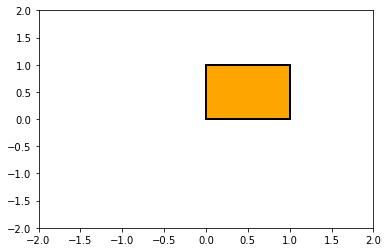

In [1]:
# Source: https://matplotlib.org/users/path_tutorial.html

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
    (0., 0.), # left, bottom
    (0., 1.), # left, top
    (1., 1.), # right, top
    (1., 0.), # right, bottom
    (0., 0.), # ignored
    ]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()


Here is the sample modified to use a monad.

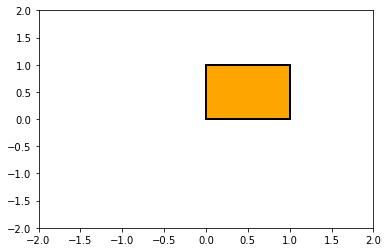

In [3]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

class Up:
  def __init__(self):
    self.name = "up"

  def __str__(self):
    return self.name

  def __call__(self, v, distance=1.0):
    (x, y) = v
    y = y + distance
    return (x, y)

class Down:
  def __init__(self):
    self.name = "down"

  def __str__(self):
    return self.name

  def __call__(self, v, distance=1.0):
    (x, y) = v
    y = y - distance
    return (x, y)

class Left:
  def __init__(self):
    self.name = "left"

  def __str__(self):
    return self.name

  def __call__(self, v, distance=1.0):
    (x, y) = v
    x = x - distance
    return (x, y)

class Right:
  def __init__(self):
    self.name = "right"

  def __str__(self):
    return self.name

  def __call__(self, v, distance=1.0):
    (x, y) = v
    x = x + distance
    return (x, y)

class MoveTo:
  def __init__(self):
    self.name = "moveto"

  def __str__(self):
    return self.name

  def __call__(self, v):
    return Path.MOVETO

class LineTo:
  def __init__(self):
    self.name = "lineto"

  def __str__(self):
    return self.name

  def __call__(self, v):
    return Path.LINETO

class Curve3:
  def __init__(self):
    self.name = "curve3"

  def __str__(self):
    return self.name

  def __call__(self, v):
    return Path.CURVE3

class Curve4:
  def __init__(self):
    self.name = "curve4"

  def __str__(self):
    return self.name

  def __call__(self, v):
    return Path.CURVE4

class ClosePoly:
  def __init__(self):
    self.name = "closepoly"

  def __str__(self):
    return self.name

  def __call__(self, v):
    return Path.CLOSEPOLY

class PathMonad:
  def __init__(self, s, v, *args, **kwargs):
    self.value_ = v
    self.args_   = args
    self.kwargs_ = kwargs
    self.verts_ = []
    self.codes_ = []
    self.state_ = s
    return

  @staticmethod
  def unit(value, *args, **kwargs):
    return PathMonad([], value, *args, **kwargs)

  def bind(self, function, *args, **kwargs):
    if (callable(self.value_)):
      v = self.value_(*self.args_, **self.kwargs_)
      self.args_ = None
      self.kwargs_ = None
    else:
      v = self.value_
    r = function(v, *args, **kwargs)

    (x, y) = v
    self.state_.append(str(function) + "(" + str(x) + ", " + str(y) + ")")

    if (function.name in ('moveto', 'lineto', 'curve3', 'curve4', 'closepoly')):
      v = self.value_
      self.verts_.append(v)
      self.codes_.append(r)
    else:
      self.value_ = r

    return self

  def join(self):
    return (self.verts_, self.codes_)

  def trace(self):
    # not part of monad interface
    return self.state_

def main():
  m = PathMonad([], (0.0, 0.0))

  up = Up()
  down = Down()
  left = Left()
  right = Right()
  moveto = MoveTo()
  lineto = LineTo()
  # curve3 = Curve3()
  # curve4 = Curve4()

  closepoly = ClosePoly()

  (verts, codes) = (m.bind(moveto)
                     .bind(up)
                     .bind(lineto)
                     .bind(right)
                     .bind(lineto)
                     .bind(down)
                     .bind(lineto)
                     .bind(left)
                     .bind(closepoly)
                     .join())
  # print(m.trace())

  path = Path(verts, codes)

  fig = plt.figure()
  ax = fig.add_subplot(111)
  patch = patches.PathPatch(path, facecolor='orange', lw=2)
  ax.add_patch(patch)
  ax.set_xlim(-2, 2)
  ax.set_ylim(-2, 2)
  plt.show()


if __name__ == '__main__':
  main()



A monad is just one of several algebraic data types used in functional programming.

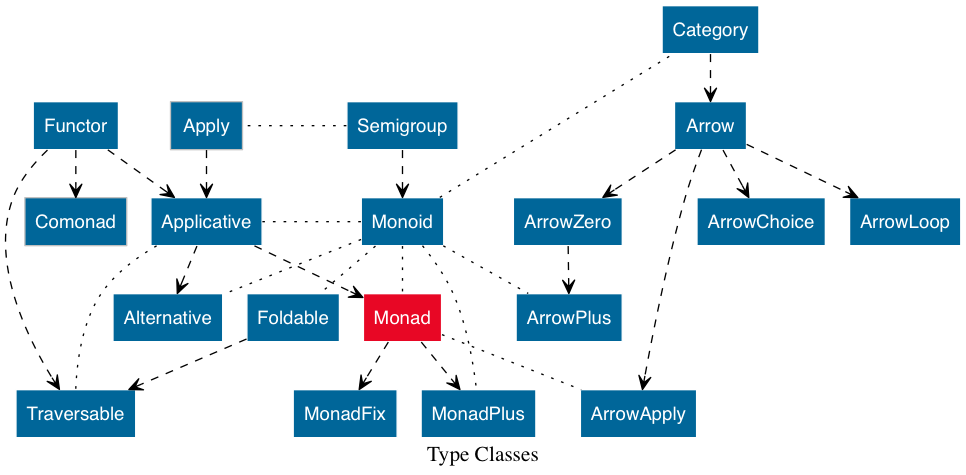

In [11]:
#
# Source: http://matthiaseisen.com/articles/graphviz/
#         https://wiki.haskell.org/Typeclassopedia
#
import graphviz as gv
import functools
import types
import pydotplus
from IPython.display import Image, display

graph = functools.partial(gv.Graph, format='svg')
digraph = functools.partial(gv.Digraph, format='png')

#
# digraph {
#   node [shape=box];
#   Functor -> Applicative -> Monad;
#   Apply -> Applicative;
#   Semigroup -> Apply [constraint=false; style=dotted; arrowhead=none];
#   Apply [color=grey];
#   Applicative -> Alternative;
#   Monad -> MonadPlus;
#   Monad -> MonadFix;
#   Semigroup -> Monoid;
#   Monoid -> Applicative [constraint=false; style=dotted; arrowhead=none];
#   Monoid -> Category [constraint=false; style=dotted; arrowhead=none];
#   Monoid -> Alternative [style=dotted; arrowhead=none];
#   Monoid -> MonadPlus [style=dotted; arrowhead=none];
#   Category -> Arrow -> ArrowChoice;
#   Arrow -> ArrowApply;
#   Arrow -> ArrowLoop;
#   Arrow -> ArrowZero -> ArrowPlus;
#   {rank = same; Arrow; ArrowZero; ArrowPlus}
#   Monoid -> ArrowPlus [style=dotted; arrowhead=none];
#   Monad -> ArrowApply [style=bold, arrowhead=none];
#   Monoid -> Foldable [style=dotted; arrowhead=none];
#   Monoid -> Monad [style=dotted; arrowhead=none];
#   Applicative -> Traversable [style=dotted; arrowhead=none];
#   Foldable -> Traversable;
#   Functor -> Traversable;
#   Comonad [color=grey];
#   Functor -> Comonad;
# }
#

def add_nodes(graph, nodes):
  for n in nodes:
    if isinstance(n, tuple):
      graph.node(n[0], **n[1])
    else:
      graph.node(n)
  return graph


def add_edges(graph, edges):
  for e in edges:
    if isinstance(e[0], tuple):
      graph.edge(*e[0], **e[1])
    else:
      graph.edge(*e)
  return graph


def apply_styles(graph, styles):
  graph.graph_attr.update(
    ('graph' in styles and styles['graph']) or {}
  )
  graph.node_attr.update(
    ('nodes' in styles and styles['nodes']) or {}
  )
  graph.edge_attr.update(
    ('edges' in styles and styles['edges']) or {}
  )
  return graph

def main():
  g = add_edges(
    add_nodes(digraph(), [
      ('Functor', {'label': 'Functor'}),
      ('Apply', {'label': 'Apply', 'color': 'grey'}),
      ('Semigroup', {'label': 'Semigroup'}),
      ('Comonad', {'label': 'Comonad', 'color': 'grey'}),
      ('Applicative', {'label': 'Applicative'}),
      ('Monoid', {'label': 'Monoid'}),
      ('Category', {'label': 'Category'}),
      ('Alternative', {'label': 'Alternative'}),
      ('Foldable', {'label': 'Foldable'}),
      ('Monad', {'label': 'Monad', 'fillcolor': '#E80725'}),
      ('Arrow', {'label': 'Arrow'}),
      ('ArrowZero', {'label': 'ArrowZero'}),
      ('ArrowPlus', {'label': 'ArrowPlus'}),
      ('Traversable', {'label': 'Traversable'}),
      ('MonadFix', {'label': 'MonadFix'}),
      ('MonadPlus', {'label': 'MonadPlus'}),
      ('ArrowApply', {'label': 'ArrowApply'}),
      ('ArrowChoice', {'label': 'ArrowChoice'}),
      ('ArrowLoop', {'label': 'ArrowLoop'}),
    ]),
    [
      (('Functor', 'Applicative'), {'label': ''}),
      (('Applicative', 'Monad'), {'label': ''}),
      (('Apply', 'Applicative'), {'label': ''}),
      (('Semigroup', 'Apply'),
       {'label': '', 'constraint': 'false',
        'style': 'dotted', 'arrowhead': 'none'}),
      (('Applicative', 'Alternative'), {'label': ''}),
      (('Monad', 'MonadPlus'), {'label': ''}),
      (('Monad', 'MonadFix'), {'label': ''}),
      (('Semigroup', 'Monoid'), {'label': ''}),
      (('Monoid', 'Applicative'),
       {'label': '', 'constraint': 'false',
        'style': 'dotted', 'arrowhead': 'none'}),
      (('Monoid', 'Category'),
       {'label': '', 'constraint': 'false',
        'style': 'dotted', 'arrowhead': 'none'}),
      (('Monoid', 'Alternative'),
       {'label': '', 'style': 'dotted', 'arrowhead': 'none'}),
      (('Monoid', 'MonadPlus'),
       {'label': '', 'style': 'dotted', 'arrowhead': 'none'}),
      (('Category', 'Arrow'), {'label': ''}),
      (('Arrow', 'ArrowChoice'), {'label': ''}),
      (('Arrow', 'ArrowApply'), {'label': ''}),
      (('Arrow', 'ArrowLoop'), {'label': ''}),
      (('Arrow', 'ArrowZero'), {'label': ''}),
      (('ArrowZero', 'ArrowPlus'), {'label': ''}),
      (('Monoid', 'ArrowPlus'),
       {'label': '', 'style': 'dotted', 'arrowhead': 'none'}),
      (('Monad', 'ArrowApply'),
       {'label': '', 'style': 'dotted', 'arrowhead': 'none'}),
      (('Monoid', 'Foldable'),
       {'label': '', 'style': 'dotted', 'arrowhead': 'none'}),
      (('Monoid', 'Monad'),
       {'label': '', 'style': 'dotted', 'arrowhead': 'none'}),
      (('Applicative', 'Traversable'),
       {'label': '', 'style': 'dotted', 'arrowhead': 'none'}),
      (('Foldable', 'Traversable'), {'label': ''}),
      (('Functor', 'Traversable'), {'label': ''}),
      (('Functor', 'Comonad'), {'label': ''}),
    ]
  )

  styles = {
    'graph': {
      'label': 'Type Classes',
      'fontsize': '16',
      'fontcolor': 'black',
      'bgcolor': 'white',
      'rankdir': 'TB',
      'rank': 'same; Arrow; ArrowZero; ArrowPlus'
    },
    'nodes': {
      'fontname': 'Helvetica',
      'shape': 'box',
      'fontcolor': 'white',
      'color': 'white',
      'style': 'filled',
      'fillcolor': '#006699',
    },
    'edges': {
      'style': 'dashed',
      'color': 'black',
      'arrowhead': 'open',
      'fontname': 'Courier',
      'fontsize': '12',
      'fontcolor': 'white',
    }
  }

  g = apply_styles(g, styles)
  g.render('img/typeclasses')
  display(Image(filename='img/typeclasses.png'))

if __name__ == '__main__':
  main()


# References

These references have much more detailed explanations of what a monad is and more examples.

1. [Composing Software: An Introduction](https://medium.com/javascript-scene/composing-software-an-introduction-27b72500d6ea)
2. [Composing Software: Functors & Categories](https://medium.com/javascript-scene/functors-categories-61e031bac53f)
3. [Composing Software: JavaScript Monads Made Simple](https://medium.com/javascript-scene/javascript-monads-made-simple-7856be57bfe8)
4. [Monads for the Curious Programmer, Part 1](https://bartoszmilewski.com/2011/01/09/monads-for-the-curious-programmer-part-1/)
5. [Category Theory for Programmers: The Preface](https://bartoszmilewski.com/2014/10/28/category-theory-for-programmers-the-preface/)
6. [Typeclassopedia](https://wiki.haskell.org/Typeclassopedia)
7. [Identity Element](https://en.wikipedia.org/wiki/Identity_element)
8. [The Identity Monad - Douglas Crockford](https://www.youtube.com/watch?v=f0xbpFx9hkg&app=desktop)
9. [The Maybe Monad - Douglas Crockford](https://www.youtube.com/watch?v=hAIbiVYYRQ0)
10. [The Four Polymorphisms in C++](http://www.catonmat.net/blog/cpp-polymorphism/)
11. [CS3110 Monads](http://www.cs.cornell.edu/courses/cs3110/2016fa/l/23-monads/lec.pdf)
12. [Currying versus partial application (with JavaScript code)](http://2ality.com/2011/09/currying-vs-part-eval.html)
13. [ESNext Proposal: The Pipeline Operator](https://github.com/tc39/proposal-pipeline-operator)
14. [Free and Freer Monads: Putting Monads Back into Closet](http://okmij.org/ftp/Computation/free-monad.html)
15. [Monad (functional programming)](https://en.wikipedia.org/wiki/Monad_(functional_programming))